# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (16,6)


In [2]:
def heatmap_ml(df):
    corr = df.corr().round(2)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(16, 8))

        ax = sns.heatmap(corr, cmap = 'RdBu_r', annot=True,  mask=mask, vmax=1, vmin= -1, square=True)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
data = pd.read_csv('../data/Wholesale customers data.csv')

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [5]:
#Attribute Information
print('''Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)''')

Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)


In [6]:
# Your code here:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


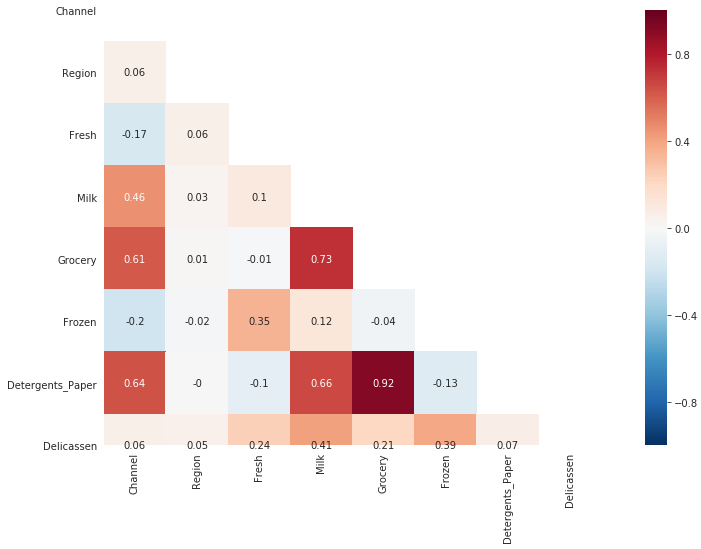

In [7]:
heatmap_ml(data)

In [8]:
# Your observations here

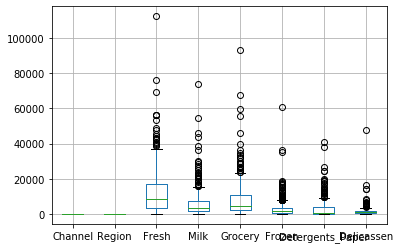

In [9]:
data.boxplot()

##### Fresh

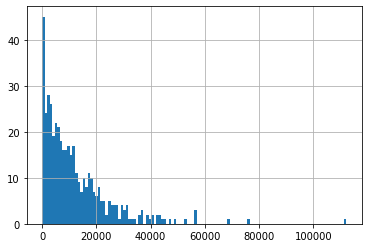

In [10]:
data['Fresh'].hist(bins=120)

In [11]:
    #Outliers
Q1 = data['Fresh'].quantile(0.25) 
Q3 = data['Fresh'].quantile(0.75) 
IQR = data['Fresh'].quantile(0.75) - data['Milk'].quantile(0.25)
    #remove_outliers
data = data[(data['Fresh'] < Q3+IQR*1.5) & (data['Fresh'] > Q1-IQR*1.5)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1203a6b50>,
 'caps': [<matplotlib.lines.Line2D at 0x120415650>,
 'boxes': [<matplotlib.lines.Line2D at 0x12039be90>],
 'medians': [<matplotlib.lines.Line2D at 0x120415590>],
 'fliers': [<matplotlib.lines.Line2D at 0x12039bed0>],
 'means': []}

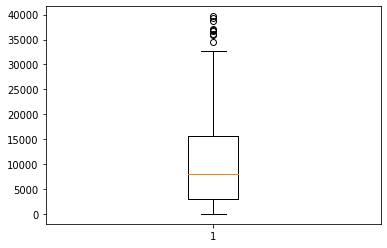

In [12]:
plt.boxplot(data['Fresh'])

##### Milk

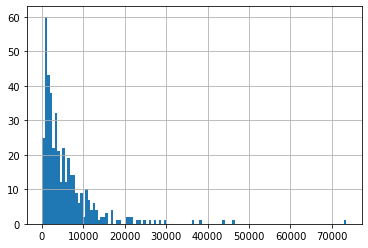

In [13]:
data['Milk'].hist(bins=120)

In [14]:
    #Outliers
Q1 = data['Milk'].quantile(0.25) 
Q3 = data['Milk'].quantile(0.75) 
IQR = data['Milk'].quantile(0.75) - data['Milk'].quantile(0.25)
    #remove_outliers
data = data[(data['Milk'] < Q3+IQR*1.5) & (data['Milk'] > Q1-IQR*1.5)]

{'whiskers': [<matplotlib.lines.Line2D at 0x12062e250>,
 'caps': [<matplotlib.lines.Line2D at 0x12062ed10>,
 'boxes': [<matplotlib.lines.Line2D at 0x120628590>],
 'medians': [<matplotlib.lines.Line2D at 0x120636790>],
 'fliers': [<matplotlib.lines.Line2D at 0x120636c90>],
 'means': []}

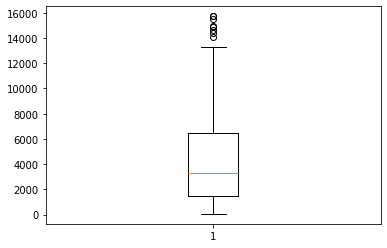

In [15]:
plt.boxplot(data['Milk'])

##### Grocery

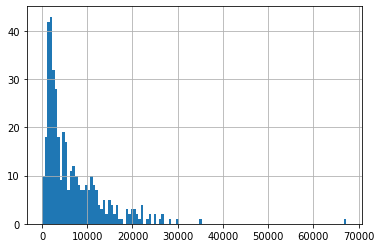

In [16]:
data["Grocery"].hist(bins=120)

In [17]:
    #Outliers
Q1 = data["Grocery"].quantile(0.25) 
Q3 = data["Grocery"].quantile(0.75) 
IQR = data["Grocery"].quantile(0.75) - data["Grocery"].quantile(0.25)
    #remove_outliers
data = data[(data["Grocery"] < Q3+IQR*1.5) & (data["Grocery"] > Q1-IQR*1.5)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1208c7e50>,
 'caps': [<matplotlib.lines.Line2D at 0x12094f6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12094a090>],
 'medians': [<matplotlib.lines.Line2D at 0x12094f610>],
 'fliers': [<matplotlib.lines.Line2D at 0x120956650>],
 'means': []}

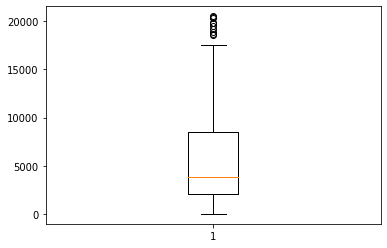

In [18]:
plt.boxplot(data["Grocery"])

##### Frozen

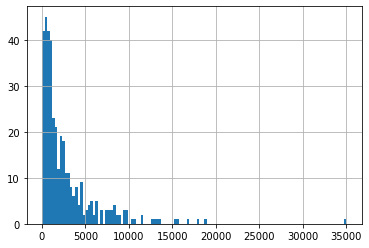

In [19]:
data["Frozen"].hist(bins=120)

In [20]:
    #Outliers
Q1 = data["Frozen"].quantile(0.25) 
Q3 = data["Frozen"].quantile(0.75) 
IQR = data["Frozen"].quantile(0.75) - data["Frozen"].quantile(0.25)
    #remove_outliers
data = data[(data["Frozen"] < Q3+IQR*1.5) & (data["Frozen"] > Q1-IQR*1.5)]

{'whiskers': [<matplotlib.lines.Line2D at 0x11fe7a690>,
 'caps': [<matplotlib.lines.Line2D at 0x11fe7a590>,
 'boxes': [<matplotlib.lines.Line2D at 0x120c4f9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x120c5ebd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x120c5e5d0>],
 'means': []}

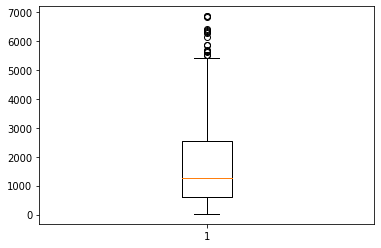

In [21]:
plt.boxplot(data["Frozen"])

##### Detergents_Paper

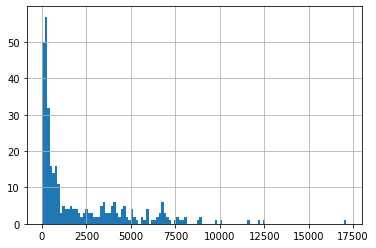

In [22]:
data["Detergents_Paper"].hist(bins=120)

In [23]:
    #Outliers
Q1 = data["Detergents_Paper"].quantile(0.25) 
Q3 = data["Detergents_Paper"].quantile(0.75) 
IQR = data["Detergents_Paper"].quantile(0.75) - data["Detergents_Paper"].quantile(0.25)
    #remove_outliers
data = data[(data["Detergents_Paper"] < Q3+IQR*1.5) & (data["Detergents_Paper"] > Q1-IQR*1.5)]

{'whiskers': [<matplotlib.lines.Line2D at 0x120f6ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x120f707d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x120f6e050>],
 'medians': [<matplotlib.lines.Line2D at 0x120f70710>],
 'fliers': [<matplotlib.lines.Line2D at 0x120f78750>],
 'means': []}

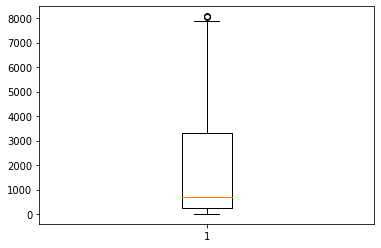

In [24]:
plt.boxplot(data["Detergents_Paper"])

##### Delicassen

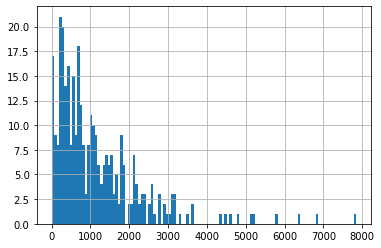

In [25]:
data["Delicassen"].hist(bins=120)

In [26]:
    #Outliers
Q1 = data["Delicassen"].quantile(0.25) 
Q3 = data["Delicassen"].quantile(0.75) 
IQR = data["Delicassen"].quantile(0.75) - data["Delicassen"].quantile(0.25)
    #remove_outliers
data = data[(data["Delicassen"] < Q3+IQR*1.5) & (data["Delicassen"] > Q1-IQR*1.5)]

{'whiskers': [<matplotlib.lines.Line2D at 0x12128ff10>,
 'caps': [<matplotlib.lines.Line2D at 0x121296990>,
 'boxes': [<matplotlib.lines.Line2D at 0x12128f290>],
 'medians': [<matplotlib.lines.Line2D at 0x1212968d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12129d910>],
 'means': []}

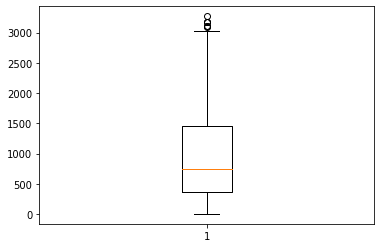

In [27]:
plt.boxplot(data["Delicassen"])

### SKEWEDNESS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12128f8d0>,
      dtype=object)

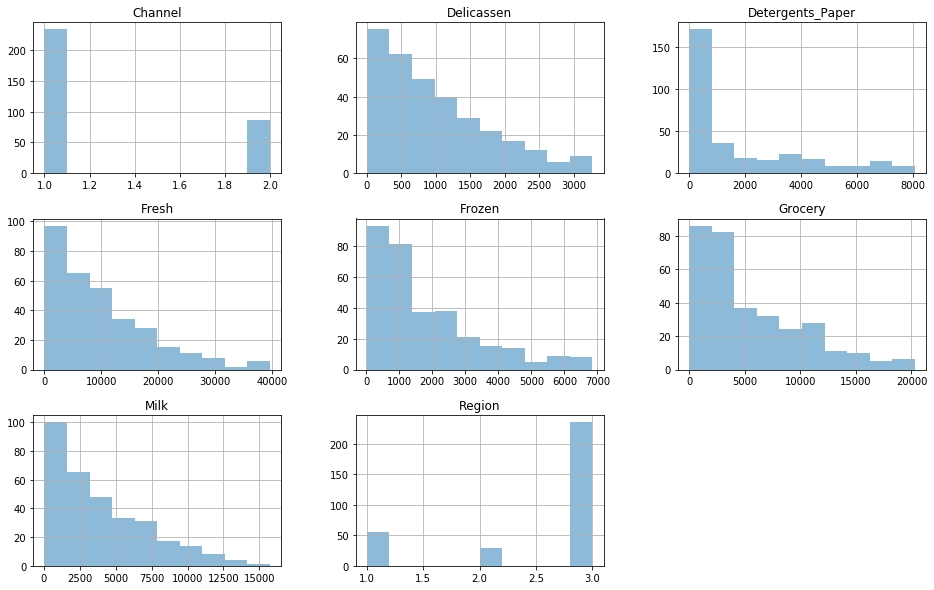

In [28]:
data.hist(alpha=0.5, figsize=(16, 10))

In [29]:
data.skew()

Channel             1.035110
Region             -1.359583
Fresh               1.179363
Milk                1.034226
Grocery             1.086166
Frozen              1.237975
Detergents_Paper    1.261845
Delicassen          0.962037
dtype: float64

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [30]:
# Your code here

In [31]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [32]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
customers_scale = StandardScaler().fit_transform(data)
customers_scale

array([[ 1.64001682,  0.56847665,  0.30997712, ..., -0.98752053,
         0.38592159,  0.43798687],
       [ 1.64001682,  0.56847665, -0.34033977, ..., -0.02630014,
         0.66749995,  0.99425575],
       [-0.60974984,  0.56847665,  0.37904143, ...,  2.85611912,
        -0.59983011,  1.00949599],
       ...,
       [-0.60974984,  0.56847665,  3.38762615, ...,  1.68005232,
        -0.78815554,  1.71816731],
       [-0.60974984,  0.56847665,  0.03429931, ..., -0.47586317,
        -0.75403861,  1.43749283],
       [-0.60974984,  0.56847665, -0.8351461 , ..., -1.0800411 ,
        -0.61347688, -1.19525921]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [33]:
# Your code here:
kmeans = KMeans().fit(customers_scale)
data['labels'] = kmeans.labels_


Count the values in `labels`.

In [34]:
# Your code here:
data['labels'].value_counts()

4    79
0    49
1    42
2    38
6    35
7    29
5    27
3    22
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [35]:
# Your code here
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5).fit(customers_scale)
data['labels_DBSCAN'] = dbscan.labels_


Count the values in `labels_DBSCAN`.

In [36]:
# Your code here
data['labels_DBSCAN'].value_counts()

-1    300
 0     21
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

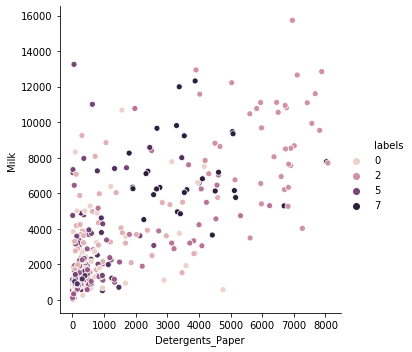

In [37]:
# Your code here:
sns.relplot(x='Detergents_Paper', y='Milk', hue='labels', data=data)

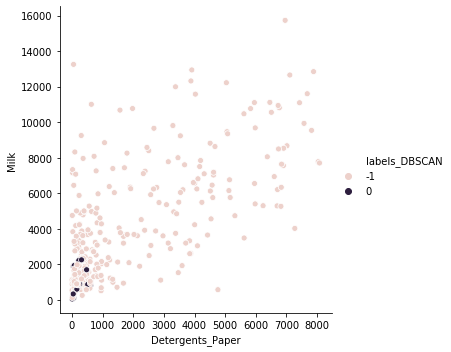

In [38]:
sns.relplot(x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', data=data)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

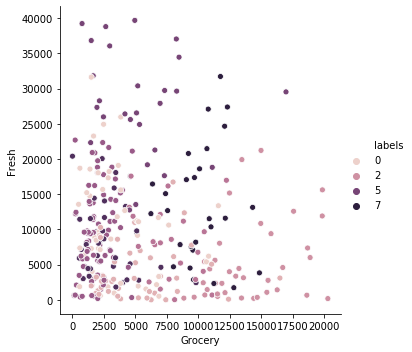

In [39]:
# Your code here:
sns.relplot(x='Grocery', y='Fresh', hue='labels', data=data)

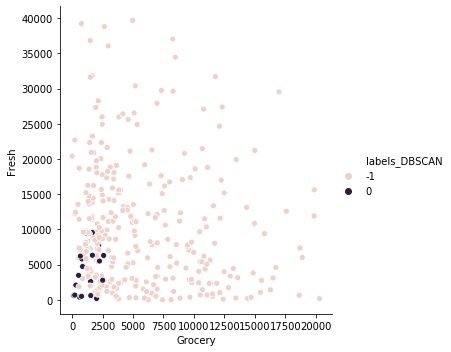

In [40]:
sns.relplot(x='Grocery', y='Fresh', hue='labels_DBSCAN', data=data)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

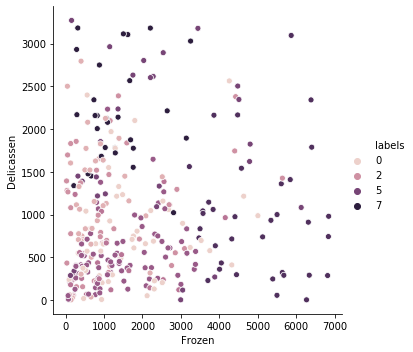

In [41]:
# Your code here:
sns.relplot(x='Frozen', y='Delicassen', hue='labels', data=data)

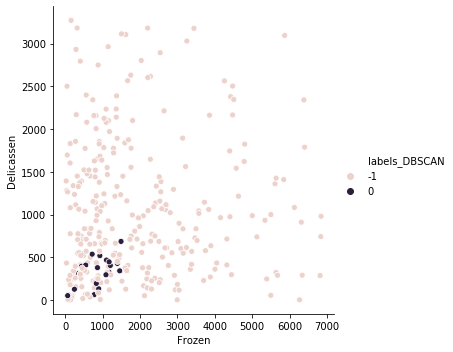

In [42]:
sns.relplot(x='Frozen', y='Delicassen', hue='labels_DBSCAN', data=data)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [43]:
# Your code here:
data.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.000000,1.142857,10296.959184,2719.979592,3505.367347,1784.469388,921.551020,812.408163,-1.000000
1,1.000000,2.952381,3924.166667,4055.333333,5226.880952,777.428571,1245.809524,1102.047619,-1.000000
2,1.921053,2.684211,5132.210526,9094.289474,14016.657895,1266.736842,6281.447368,1024.026316,-1.000000
3,2.000000,2.727273,7984.909091,4765.500000,7808.500000,1200.681818,3442.090909,457.545455,-1.000000
4,1.000000,2.949367,9388.063291,1401.101266,1995.569620,1400.607595,352.544304,516.835443,-0.734177
5,1.037037,2.777778,27835.370370,4297.851852,5318.703704,2260.370370,552.962963,1726.148148,-1.000000
6,1.028571,2.571429,8231.342857,2540.200000,2745.628571,4981.885714,665.057143,962.714286,-1.000000
7,1.965517,2.862069,13334.827586,7152.551724,9812.206897,1328.000000,3726.379310,2158.344828,-1.000000


In [44]:
data.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.29,2.533333,10393.443333,4181.926667,5827.746667,1873.213333,1940.133333,1039.133333,3.213333
0,1.00,3.000000,4287.809524,1071.857143,1394.952381,820.666667,189.714286,336.000000,4.000000


Which algorithm appears to perform better?

In [45]:
# Your observations here
#DBSCAN seems to preform better.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


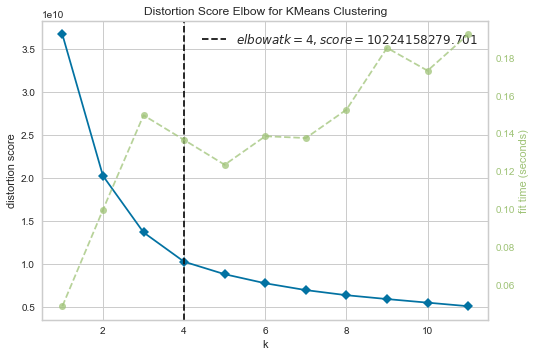

In [46]:
# Your code here
def KElbowVisualizer(modelo, metrica, kk, X):
    from yellowbrick.cluster import KElbowVisualizer
    model = modelo()
    visualizer = KElbowVisualizer(model, k=kk, metric=metrica).fit(X) # Fit the data to the visualizer
    return visualizer.show()        # Finalize and render the figure
KElbowVisualizer(KMeans, 'distortion',(1,12) , data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']])

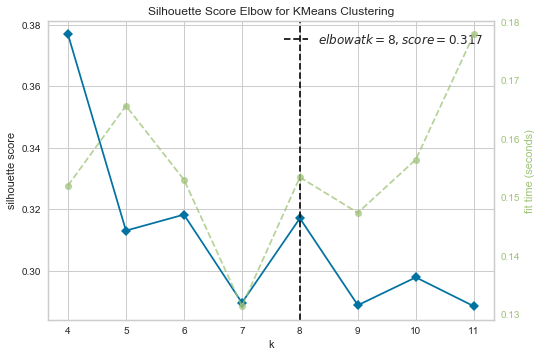

In [47]:
KElbowVisualizer(KMeans, 'silhouette', (4,12), data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']])

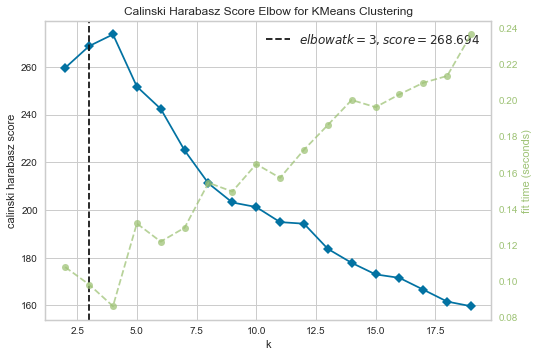

In [48]:
# Your comment here
KElbowVisualizer(KMeans, 'calinski_harabasz',(2,20), data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']])

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [49]:
# Your code here
dbscan = DBSCAN(eps=3, min_samples=2).fit(customers_scale)
data['labels_DBSCAN'] = dbscan.labels_


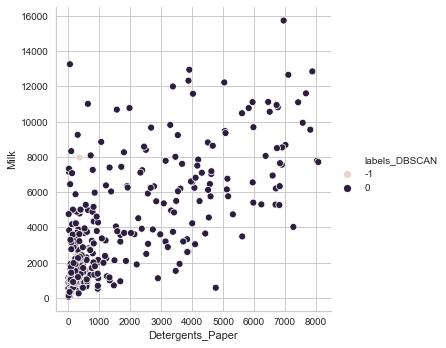

In [50]:
sns.relplot(x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', data=data)

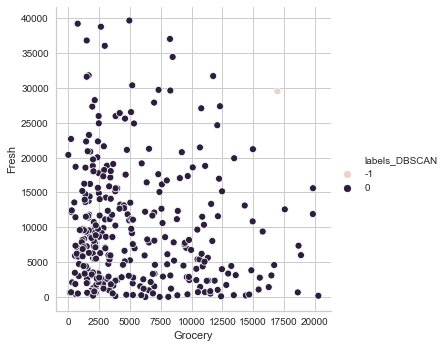

In [51]:
sns.relplot(x='Grocery', y='Fresh', hue='labels_DBSCAN', data=data)

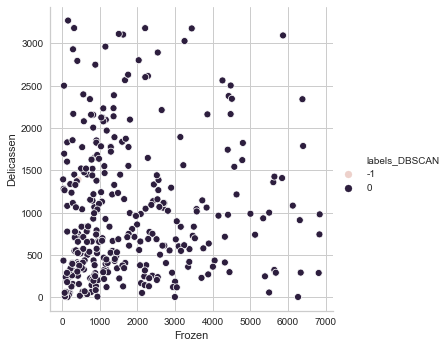

In [52]:
sns.relplot(x='Frozen', y='Delicassen', hue='labels_DBSCAN', data=data)

In [53]:
# Your comment here